In [1]:
# True: Google Colab Notebook
# False: My local PC
colab = False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    !ls /content/drive/MyDrive/output/otto/
    base_path = '/content/drive/MyDrive'
    notebook_path = base_path + '/otto/notebook'
else:
    base_path = '../data'
    notebook_path = '.'

# Preprocessing

In [2]:
# ====================================================
# Library
# ====================================================
import gc
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm
import itertools
import sys
sys.path.append(f"{notebook_path}/../src/")
import feature_engineering as fe

In [3]:
#test = pd.read_parquet('/content/drive/MyDrive/output/otto/test.parquet')
#test = pd.read_parquet(f'{base_path}/output/otto/test_50_tmp.parquet')
#test = pd.read_parquet(f'{base_path}/output/otto/test_50_0.parquet')
test = pd.read_parquet(f'{base_path}/output/otto/test_50_0_ver2.parquet')

In [ ]:
# fileを分割して書き出す, 0 or 1
OUTPUT_SPLIT_NUM = 0

In [4]:
output_session_splits = 4
min_val = test['session'].min()
max_val = test['session'].max()
print('OUTPUT_SPLIT_NUM=', OUTPUT_SPLIT_NUM)
print('original min session:', min_val, 'max_session:', max_val, 'shape:', test.shape)

output_session_splits_list = [int(min_val) + int(i*(max_val - min_val) / output_session_splits) for i in range(output_session_splits)]
print('output_session_splits=', output_session_splits)
print('output_session_splits_list=', output_session_splits_list)

if OUTPUT_SPLIT_NUM == output_session_splits - 1:
    test = test[output_session_splits_list[OUTPUT_SPLIT_NUM] <= test['session']]
else:
    test = test[(output_session_splits_list[OUTPUT_SPLIT_NUM] <= test['session']) & (test['session'] < output_session_splits_list[OUTPUT_SPLIT_NUM + 1])]
print('after min session:', test['session'].min(), 'max_session:', test['session'].max(), 'shape:', test.shape)

OUTPUT_SPLIT_NUM= 0
original min session: 12899779 max_session: 14571581 shape: (216601197, 25)
output_session_splits= 3
output_session_splits_list= [12899779, 13457046, 14014313]
after min session: 12899779 max_session: 13457045 shape: (72470828, 25)


In [5]:
DEBUG_MODE = False
#DEBUG_MODE = True

if DEBUG_MODE:
    test = test.head(100000)
IGNORE_COL = ['session','aid']

type_list = ['clicks', 'carts', 'orders']
#type_list = ['carts', 'orders']

#TYPE_MODE = 'clicks'
#TYPE_MODE = 'carts'
#TYPE_MODE = 'orders'

session_path = f'{base_path}/output/otto/test_session_features.parquet'
aid_path = f'{base_path}/output/otto/test_aid_features.parquet'

In [6]:
# importanceが極端に低いものを削る (18件)
def remove_features(df):
    DROP_COL = ['session_type_mean']
    df = df.drop(DROP_COL, axis=1)
    return df

In [7]:
test = fe.reduce_memory(test)

In [8]:
# join aid and session features
test = fe.join_session_features(test, session_path)
test = fe.join_aid_features(test, aid_path)
test = fe.join_interactive_features(test)
test = remove_features(test)

In [9]:
print('shape:', test.shape)
test

shape: (72470828, 170)


,session,aid,score_click,score_cart,score_buy,score_click_only,score_cart_only,score_buy_only,n_clicks_5,n_clicks_10,n_clicks_20,n_clicks_30,n_carts_5_ver0,n_carts_5_ver1,n_carts_15_ver0,n_carts_15_ver1,n_carts_20_ver0,n_carts_20_ver1,n_buys_5_ver0,n_buys_5_ver1,n_buys_15_ver0,n_buys_15_ver1,n_buys_20_ver0,n_buys_20_ver1,session_action_count,session_click_count,session_cart_count,session_order_count,session_last_type,session_first_action_ts_diff,session_last_action_ts_diff,session_ts_period,session_mean_action_ts_diff,session_unique_aid_action_count,session_unique_aid_click_count,session_unique_aid_cart_count,session_unique_aid_order_count,session_click_rate,session_cart_rate,session_order_rate,session_unique_aid_click_rate,session_unique_aid_cart_rate,session_unique_aid_order_rate,session_total_uu_action_ratio,session_clicks_uu_action_ratio,session_carts_uu_action_ratio,session_orders_uu_action_ratio,session_mean_aid_clicks_count_4weeks,session_mean_aid_carts_count_4weeks,session_mean_aid_orders_count_4weeks,session_mean_aid_total_count_4weeks,session_mean_aid_total_uu_4weeks,session_mean_aid_clicks_uu_4weeks,session_mean_aid_carts_uu_4weeks,session_mean_aid_orders_uu_4weeks,session_mean_aid_total_uu_action_ratio_4weeks,session_mean_aid_clicks_uu_action_ratio_4weeks,session_mean_aid_carts_uu_action_ratio_4weeks,session_mean_aid_orders_uu_action_ratio_4weeks,session_mean_aid_clicks_count_2weeks,session_mean_aid_carts_count_2weeks,session_mean_aid_orders_count_2weeks,session_mean_aid_total_count_2weeks,session_mean_aid_total_uu_2weeks,session_mean_aid_clicks_uu_2weeks,session_mean_aid_carts_uu_2weeks,session_mean_aid_orders_uu_2weeks,session_mean_aid_total_uu_action_ratio_2weeks,session_mean_aid_clicks_uu_action_ratio_2weeks,session_mean_aid_carts_uu_action_ratio_2weeks,session_mean_aid_orders_uu_action_ratio_2weeks,session_mean_aid_clicks_count_1week,session_mean_aid_carts_count_1week,session_mean_aid_orders_count_1week,session_mean_aid_total_count_1week,session_mean_aid_total_uu_1week,session_mean_aid_clicks_uu_1week,session_mean_aid_carts_uu_1week,session_mean_aid_orders_uu_1week,session_mean_aid_total_uu_action_ratio_1week,session_mean_aid_clicks_uu_action_ratio_1week,session_mean_aid_carts_uu_action_ratio_1week,session_mean_aid_orders_uu_action_ratio_1week,aid_clicks_count_4weeks,aid_carts_count_4weeks,aid_orders_count_4weeks,aid_total_count_4weeks,aid_total_uu_4weeks,aid_clicks_uu_4weeks,aid_carts_uu_4weeks,aid_orders_uu_4weeks,aid_total_uu_action_ratio_4weeks,aid_clicks_uu_action_ratio_4weeks,aid_carts_uu_action_ratio_4weeks,aid_orders_uu_action_ratio_4weeks,aid_clicks_rank_4weeks,aid_carts_rank_4weeks,aid_orders_rank_4weeks,aid_mean_session_action_count_4weeks,aid_mean_session_click_count_4weeks,aid_mean_session_cart_count_4weeks,aid_mean_session_order_count_4weeks,aid_mean_session_type_mean_4weeks,aid_clicks_count_2weeks,aid_carts_count_2weeks,aid_orders_count_2weeks,aid_total_count_2weeks,aid_total_uu_2weeks,aid_clicks_uu_2weeks,aid_carts_uu_2weeks,aid_orders_uu_2weeks,aid_total_uu_action_ratio_2weeks,aid_clicks_uu_action_ratio_2weeks,aid_carts_uu_action_ratio_2weeks,aid_orders_uu_action_ratio_2weeks,aid_clicks_rank_2weeks,aid_carts_rank_2weeks,aid_orders_rank_2weeks,aid_mean_session_action_count_2weeks,aid_mean_session_click_count_2weeks,aid_mean_session_cart_count_2weeks,aid_mean_session_order_count_2weeks,aid_mean_session_type_mean_2weeks,aid_clicks_count_1week,aid_carts_count_1week,aid_orders_count_1week,aid_total_count_1week,aid_total_uu_1week,aid_clicks_uu_1week,aid_carts_uu_1week,aid_orders_uu_1week,aid_total_uu_action_ratio_1week,aid_clicks_uu_action_ratio_1week,aid_carts_uu_action_ratio_1week,aid_orders_uu_action_ratio_1week,aid_clicks_rank_1week,aid_carts_rank_1week,aid_orders_rank_1week,aid_mean_session_action_count_1week,aid_mean_session_click_count_1week,aid_mean_session_cart_count_1week,aid_mean_session_order_count_1week,aid_mean_session_type_mean_1week,aid_clicks_count_rate_1_2,aid_clicks_uu_rate_1_2,ai

In [10]:
n_splits = 5
session_splits = 5

In [11]:
min_val = test['session'].min()
max_val = test['session'].max()
print('min session:', min_val, 'max_session:', max_val)

session_splits_list = [int(min_val) + int(i*(max_val - min_val) / session_splits) for i in range(session_splits)]
print('session_splits=', session_splits)
print('session_splits_list=', session_splits_list)

min session: 12899779 max_session: 13457045
session_splits= 5
session_splits_list= [12899779, 13011232, 13122685, 13234138, 13345591]


# Read Models

In [12]:
# ====================================================
# Library
# ====================================================
import os
import gc
import warnings
warnings.filterwarnings('ignore')
import random
import scipy as sp
import numpy as np
import pandas as pd
import joblib
import itertools
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from itertools import combinations

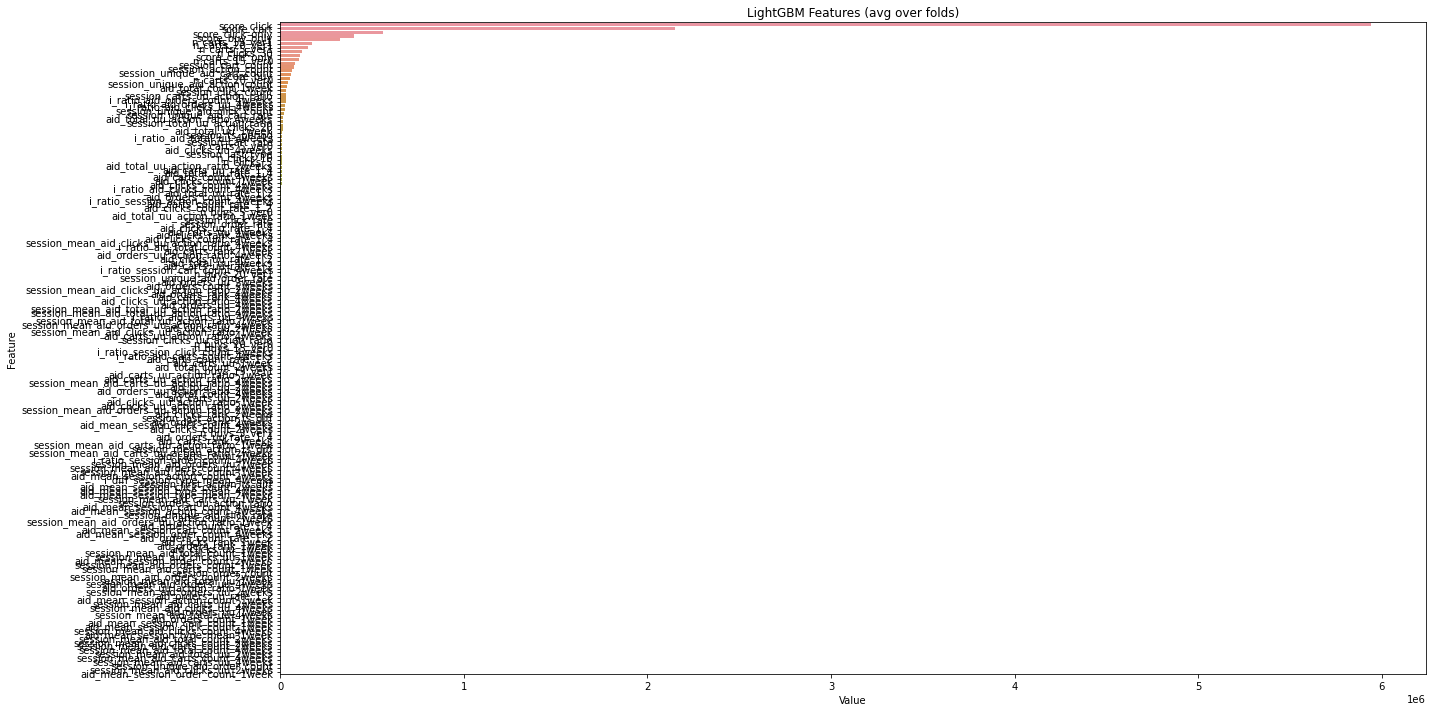

In [13]:
#model = np.load(f'/content/drive/MyDrive/otto/otto_lgbm_fold0_clicks.pkl', allow_pickle=True)
model = np.load(f'{base_path}/otto/otto_lgbm_fold0_orders.pkl', allow_pickle=True)
#model = np.load(f'{base_path}/otto/backup/otto_lgbm_fold0_orders.pkl', allow_pickle=True)


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(importance_type='gain'),model.feature_name())), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

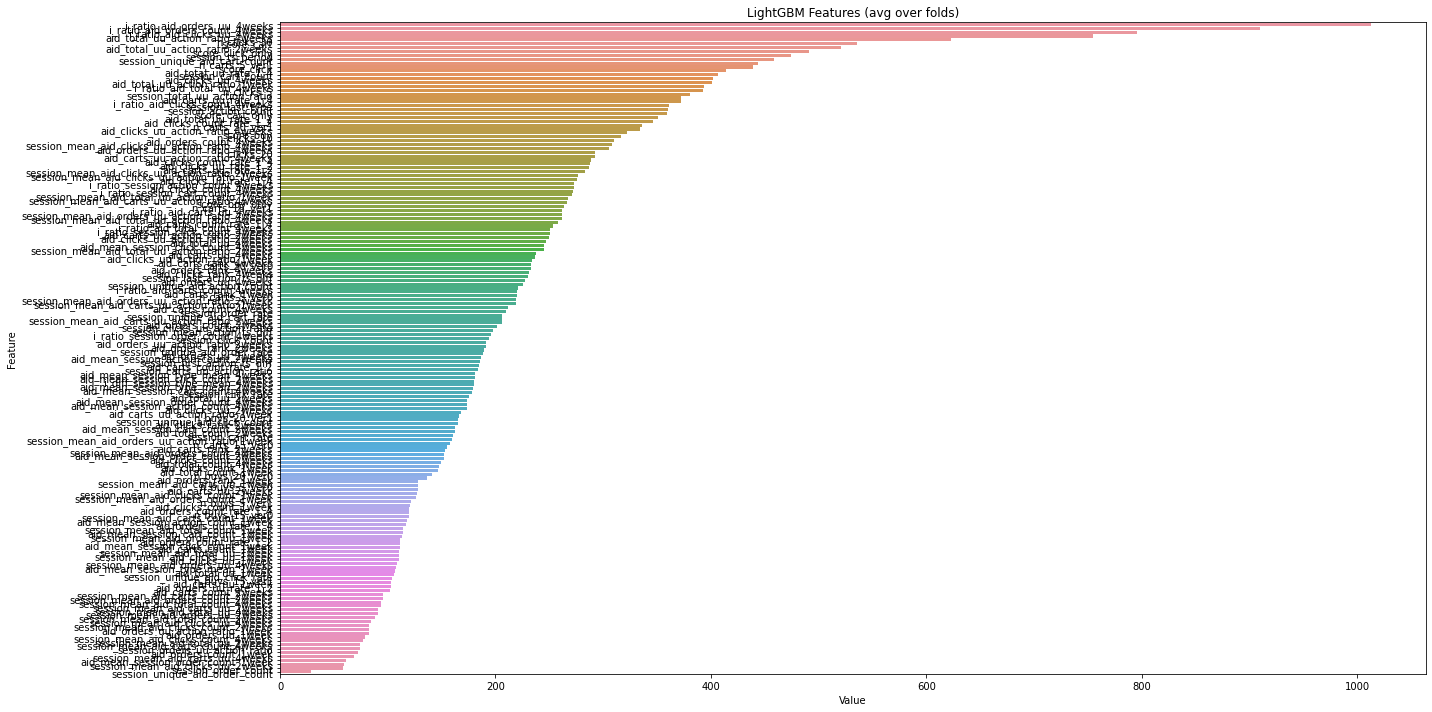

In [14]:
#model = np.load(f'/content/drive/MyDrive/otto/otto_lgbm_fold0_clicks.pkl', allow_pickle=True)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp_split = pd.DataFrame(sorted(zip(model.feature_importance(),model.feature_name())), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_split.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [15]:
#feature_imp_split

In [16]:
#feature_imp

In [ ]:
#ans_list = []
# 分割してpredictするための準備
Nrow = test.shape[0]
Ndiv = 10
n = int(Nrow // Ndiv) + 1
x_test = test.drop(IGNORE_COL , axis=1)
x_test_list = []
for i in range(Ndiv):
    tmp = x_test.iloc[i*n : (i+1)*n, :]
    x_test_list.append(tmp)
del x_test
gc.collect()

for target in type_list:
    print('target=', target,'*************')
    # Create a numpy array to store test predictions
    test_predictions = np.zeros(len(test))

    # fold looop 
    for fold in range(n_splits):
        print('fold=', fold)
        model = np.load(f'{base_path}/otto/otto_lgbm_fold{fold}_{target}.pkl', allow_pickle=True)
        test_pred_list = [] 
        for i, v in enumerate(x_test_list):
            print('test pred i=', i)
            tmp = model.predict(v)
            test_pred_list.append(tmp) 

        test_pred = np.concatenate(test_pred_list)
        del test_pred_list, model
        gc.collect()

        # testの場合はfoldの数で割る
        test_predictions += test_pred / n_splits
    
    # dfに変換していったん保存
    test_predictions = pd.DataFrame(test_predictions, columns=["score"])
    #test_predictions.to_parquet(f'{base_path}/otto/test_predictions_{target}.parquet')
    test_predictions.to_csv(f'{base_path}/otto/test_oof_lgbm_{target}_{OUTPUT_SPLIT_NUM}.csv', index = False)
    del test_predictions
    gc.collect()

del x_test_list
gc.collect()

target= clicks *************
fold= 0
test pred i= 0
test pred i= 1
test pred i= 2
test pred i= 3
test pred i= 4
test pred i= 5
test pred i= 6
test pred i= 7
test pred i= 8
test pred i= 9
fold= 1
test pred i= 0
test pred i= 1
test pred i= 2
test pred i= 3
test pred i= 4
test pred i= 5
test pred i= 6
test pred i= 7
test pred i= 8
test pred i= 9
fold= 2
test pred i= 0
test pred i= 1
test pred i= 2
test pred i= 3
test pred i= 4
test pred i= 5
test pred i= 6


## Load and Merge type

In [ ]:
sub_df_list = []

# 今後はこの2つのcolumnsしか使わないので削っておく
test = test[['session', 'aid']]

for i, t in enumerate(type_list):
    print(i, t)
    score = pd.read_csv(f'{base_path}/otto/test_oof_lgbm_{t}_{OUTPUT_SPLIT_NUM}.csv')
    pred_df = pd.concat([test, score], axis=1)
    # save score
    pred_df.to_parquet(f'{base_path}/otto/test_predictions_{t}_{OUTPUT_SPLIT_NUM}_.parquet')

    pred_df['aid'] = pred_df['aid'].astype('int32')
    del score
    gc.collect()
    for j in range(session_splits):
        print('splits session: ',j ,' from ' , session_splits_list[j])
        # last loop
        if j == session_splits - 1:
            tmp = pred_df[session_splits_list[j] <= pred_df['session']]
        else:
            tmp = pred_df[(session_splits_list[j] <= pred_df['session']) & (pred_df['session'] < session_splits_list[j+1])]
        tmp['session_type'] = tmp['session'].apply(lambda x: str(x) + f'_{t}')
        tmp = tmp.drop('session',axis=1)
        tmp = tmp.sort_values(['session_type','score'],ascending=[True, False]).reset_index(drop=True)
        tmp['n'] = tmp.groupby('session_type').cumcount().astype('int16')
        tmp = tmp.loc[tmp.n<20].drop(['n','score'],axis=1)
        tmp = tmp.groupby('session_type')['aid'].apply(list).reset_index()
        tmp['labels'] = tmp['aid'].map(lambda x: ''.join(str(x)[1:-1].split(',')))
        tmp = tmp.drop(['aid'],axis=1)
        sub_df_list.append(tmp)
del tmp, test
gc.collect()

In [ ]:
pred_df = pd.concat(sub_df_list)
del sub_df_list
gc.collect()

In [ ]:
pred_df.to_csv(f"{base_path}/output/otto/test_preds_{OUTPUT_SPLIT_NUM}.csv", index=False)
pred_df.head()

In [ ]:
pred_df.shape

In [ ]:
del pred_df
gc.collect()